In [ ]:
!pip install kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown




  0%|          | 0.00/163M [00:00<?, ?B/s]
  1%|          | 1.00M/163M [00:01<03:51, 735kB/s]
  1%|          | 2.00M/163M [00:01<02:00, 1.40MB/s]
  2%|▏         | 3.00M/163M [00:01<01:19, 2.12MB/s]
  2%|▏         | 4.00M/163M [00:02<01:04, 2.58MB/s]
  3%|▎         | 5.00M/163M [00:02<00:53, 3.11MB/s]
  4%|▎         | 6.00M/163M [00:02<00:47, 3.49MB/s]
  4%|▍         | 7.00M/163M [00:02<00:42, 3.83MB/s]
  5%|▍         | 8.00M/163M [00:03<00:39, 4.08MB/s]
  6%|▌         | 9.00M/163M [00:03<00:38, 4.21MB/s]
  6%|▌         | 10.0M/163M [00:03<00:39, 4.11MB/s]
  7%|▋         | 11.0M/163M [00:03<00:37, 4.23MB/s]
  7%|▋         | 12.0M/163M [00:03<00:35, 4.43MB/s]
  8%|▊         | 13.0M/163M [00:04<00:35, 4.42MB/s]
  9%|▊         | 14.0M/163M [00:04<00:34, 4.53MB/s]
  9%|▉         | 15.0M/163M [00:04<00:33, 4.59MB/s]
 10%|▉         | 16.0M/163M [00:04<00:34, 4.50MB/s]
 10%|█         | 17.0M/163M [00:05<00:39, 3.86MB/s]
 11%|█         | 18.0M/163M [00:05<00:38, 3.98MB/s]
 12%|█▏        | 19.0

In [3]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')


FileNotFoundError: [Errno 2] No such file or directory: '/content/face-mask-dataset.zip'

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [4]:
with_mask_files = os.listdir('data/with_mask')
without_mask_files = os.listdir('data/without_mask')
print(with_mask_files[0:5])
print(without_mask_files[0:5])


['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']


In [5]:
print(len(with_mask_files))
print(len(without_mask_files))

3725
3828


In [6]:
with_mask_label = [1]*3725
without_mask_label = [0]*3828
labels = with_mask_label + without_mask_label
print(len(labels))

7553


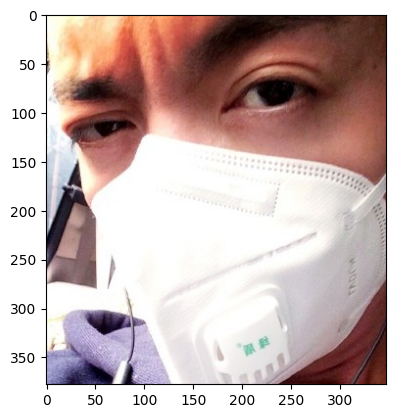

In [7]:
img = mpimg.imread('data/with_mask/with_mask_578.jpg')
implot = plt.imshow(img)
plt.show()

In [8]:
with_mask_path = 'data/with_mask/'

data = []

for img_files in with_mask_files:
  image = Image.open(with_mask_path+img_files)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = 'data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)
print(len(data))

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7553


In [9]:
X = np.array(data)
Y = np.array(labels)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [11]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [13]:
import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow.python'

In [18]:
from keras.regularizers import l2
no_of_class = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation = 'relu',kernel_regularizer=l2(0.001)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(no_of_class, activation='sigmoid'))






C:\Users\vansh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [20]:

model.fit(X_train_scaled, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 30s 152ms/step - accuracy: 0.6863 - loss: 0.6983 - val_accuracy: 0.8826 - val_loss: 0.2994
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 24s 143ms/step - accuracy: 0.8935 - loss: 0.3046 - val_accuracy: 0.9074 - val_loss: 0.2531
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 153ms/step - accuracy: 0.9120 - loss: 0.2506 - val_accuracy: 0.9107 - val_loss: 0.2210
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 153ms/step - accuracy: 0.9292 - loss: 0.1951 - val_accuracy: 0.9273 - val_loss: 0.2265
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 156ms/step - accuracy: 0.9373 - loss: 0.1865 - val_accuracy: 0.9388 - val_loss: 0.2182
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 28s 166ms/step - accuracy: 0.9407 - loss: 0.1639 - val_accuracy: 0.9521 - val_loss: 0.1769
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 154ms/step - accuracy: 0.9509 - loss: 0.1467 - val_accuracy: 0.9504 - val_loss: 0.1906
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 153ms/step - accuracy: 0.9564 - loss: 0

In [21]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9269 - loss: 0.2387
0.9278623461723328


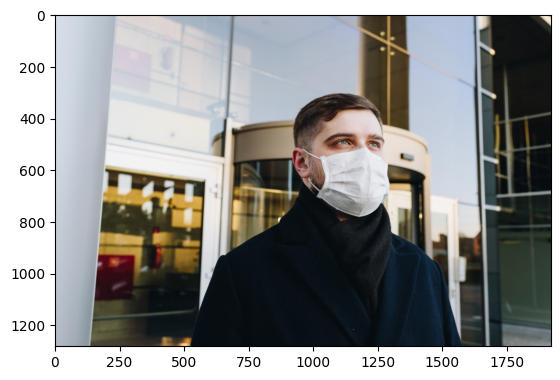

In [23]:

input_image_path = 'static/files/with_mask.jpg'
input_image = mpimg.imread(input_image_path)
plt.imshow(input_image)
plt.show()

In [24]:
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
[[0.20035666 0.9660216 ]]
1
The person in the image is wearing a mask


In [25]:
import pickle
pickle.dump(model,open('face.pkl','wb'))